# UBER Pickups 
### DAY-HOUR ANALYSIS

In [1]:
!pip install plotly==4.9.0
!pip install jupyterlab "ipywidgets>=7.5"
!jupyter labextension install jupyterlab-plotly@4.9.0
!jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget@4.9.0
!jupyter labextension list

-\|/-\|/An error occured.
ValueError: 
"jupyterlab-plotly@4.9.0" is not compatible with the current JupyterLab
Conflicting Dependencies:
JupyterLab                        Extension      Package
>=3.0.8 <3.1.0                    >=1.3.0 <2.0.0||>=2.0.0 <3.0.0@jupyterlab/rendermime-interfaces
See the log file for details:  /tmp/jupyterlab-debug-t9tf3cvp.log
-\|/-\|/-\-\|/-\|/--\|/-\|/-\Building jupyterlab assets (production, minimized)
-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|

In [2]:
!jupyter lab build

[LabBuildApp] JupyterLab 3.0.15
[LabBuildApp] Building in /usr/local/share/jupyter/lab
[LabBuildApp] Building jupyterlab assets (production, minimized)
-\|/-\|/-\|/-\|-\|/-\|/-\-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|

## CLUSTERING
### DBSCAN

In [3]:
# Importing usefull libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import plotly.express as px
import plotly.graph_objects as go

In [4]:
# Importing the pre-cleaned dataset with gps information for the 1st of September at 6PM

X = pd.read_csv('uber_pickups_1_09_6PM.csv')
X.head()

,Lat,Lon
0,40.7210,-73.9977
1,40.7641,-73.9670
2,40.7469,-73.9960
3,40.6864,-73.9686
4,40.7451,-73.9768


In [5]:
# Standardizing values

sc = StandardScaler()
X_norm = sc.fit_transform(X)
display(X_norm[0:5])

array([[-0.33915859, -0.49310311],
       [ 0.604004  , -0.10320332],
       [ 0.22761429, -0.47151257],
       [-1.09631464, -0.12352383],
       [ 0.18822466, -0.22766645]])

### BUILDING CLUSTERS

In [6]:
# Instancing and predicting

db = DBSCAN(eps = 0.5, min_samples = 90, metric = 'l2')
db.fit(X_norm)
y = db.fit_predict(X_norm)

In [7]:
# Adding the cluster number to the original dataset
X["cluster"] = y

In [8]:
display(X.head())
display(X["cluster"].value_counts())

,Lat,Lon,cluster
0,40.7210,-73.9977,0
1,40.7641,-73.9670,0
2,40.7469,-73.9960,0
3,40.6864,-73.9686,0
4,40.7451,-73.9768,0


 0    955
-1    181
 1    112
Name: cluster, dtype: int64

### VISUALIZING THROUGH A SCATTER PLOT

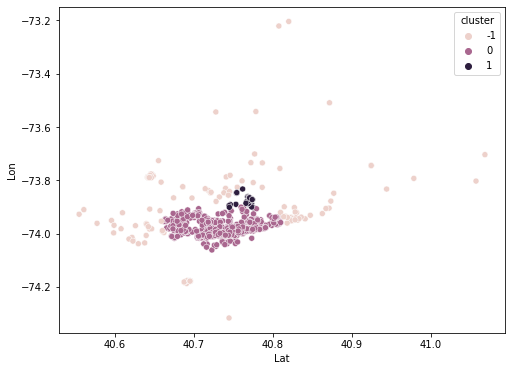

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x ='Lat', y = "Lon", data = X, hue = "cluster")

### VISUALIZING ON A MAP

In [10]:
fig = px.scatter_mapbox(X, lat = 'Lat', 
                        lon = 'Lon', 
                        color = "cluster", 
                        zoom = 10, 
                        mapbox_style = "carto-positron")

fig.show()

### CONCLUSION
This clustering method doesn't help our analysis on the different zones of uber picking, we are not going to generalize to a week analysis.

In [12]:
import plotly.io as pio
pio.write_html(fig, "DBSCAN_clustering-uber_pickups_1_09_6PM.html")